<a href="https://colab.research.google.com/github/RinadAkel/Mask-Detection/blob/main/Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Mask Detection

---
The goal of this challenge is to build a model that can detect whether a person is wearing a mask or not. You would be downloading the data from kaggle and then building you model while we guide you through the steps.


##Getting the Data

We start by getting the data. The data that we want is on kaggle and you can access it through this link: https://www.kaggle.com/omkargurav/face-mask-dataset What you will have to do, is to search for a way that allows you to download the dataset from kaggle directly into google colab (or your google drive). This process would save you the trouble from downloading the dataset locally and then uploading it to use it in colab.

In [ ]:
##Do your Research
#Test Your Zaka
from google.colab import drive
drive.mount('/content/drive')
#import os
#os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"
#%cd /content/drive/MyDrive/Kaggle/

Mounted at /content/drive


Once the dataset is downloaded, it is going to be zipped, and in order to use it, you need to unzip it. Here you have the option of unzipping it in the environment or in your google drive.

In [ ]:
  #Test Your Zaka
!kaggle datasets download -d omkargurav/face-mask-dataset --unzip

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


##Importing the Libraries

Now, it is time to import the libraries that we need.

In [ ]:
import os
import shutil
import random
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import cv2

If we look at the data that we extracted, we can see that it is located in 2 folders: with_mask and without_mask. What we need to do now, is to create a hierarchy of folders that would help us specify the training, validation, and testing data. In order to do this you have to use the **os** and the **shutil** libraries that would help you creating folders, and moving images from a folder to another. In simple terms, the libraries helps you perform the same things that you do on your computer with your operating system, but in a programmatic way.

The initial dataset contains a lot of images belonging to the 2 classes, what we will do is randomly sample from this dataset so that we reduce the training and the tuning time.

We need to have in our final directories the following:
* Training: 500 images "with_mask", and 500 images "without_mask"
* Validation: 100 images "with_mask", and 100 images "without_mask"
* Testing: 50 images "with_mask", and 50 images "without_mask"

In [ ]:
#Test Your Zaka --- Create the Train, Validation and Testing Folder
#Training Directory
directory1 = "Training"
#Parent Directory Path
parent_dir = "/content/drive/MyDrive/Kaggle"
#Path
path = os.path.join(parent_dir, directory1)
#Create the directory
os.mkdir(path)
print("Directory '% s' created" % directory1)

#Validation Directory
directory2 = "Validation"
#Parent Directory Path
parent_dir = "/content/drive/MyDrive/Kaggle"
#Path
path = os.path.join(parent_dir, directory2)
#Create the directory
os.mkdir(path)
print("Directory '% s' created" % directory2)

#Testing Directory
directory3 = "Testing"
#Parent Directory Path
parent_dir = "/content/drive/MyDrive/Kaggle"
#Path
path = os.path.join(parent_dir, directory3)
#Create the directory
os.mkdir(path)
print("Directory '% s' created" % directory3)


Directory 'Training' created
Directory 'Validation' created
Directory 'Testing' created


In [ ]:
#Test Your Zaka --- Create the classes folders inside of each folder you created above
#Training Sub-directories
subdirectory1 = "with mask"
#Parent Directory Path
parent_dir = "/content/drive/MyDrive/Kaggle/Training"
#Path
path = os.path.join(parent_dir, subdirectory1)
#Create the subdirectory
os.mkdir(path)
print("With Mask Sub-directory '% s' created" % subdirectory1)

#Training Sub-directories
subdirectory2 = "without mask"
#Parent Directory Path
parent_dir = "/content/drive/MyDrive/Kaggle/Training"
#Path
path = os.path.join(parent_dir, subdirectory2)
#Create the subdirectory
os.mkdir(path)
print("Without Mask Sub-directory '% s' created" % subdirectory2)

#Validation Sub-directories
subdirectory3 = "with mask"
#Parent Directory Path
parent_dir = "/content/drive/MyDrive/Kaggle/Validation"
#Path
path = os.path.join(parent_dir, subdirectory3)
#Create the subdirectory
os.mkdir(path)
print("With Mask Sub-directory '% s' created" % subdirectory3)

#Validation Sub-directories
subdirectory4 = "without mask"
#Parent Directory Path
parent_dir = "/content/drive/MyDrive/Kaggle/Validation"
#Path
path = os.path.join(parent_dir, subdirectory4)
#Create the subdirectory
os.mkdir(path)
print("Without Mask Sub-directory '% s' created" % subdirectory4)

#Testing Sub-directories
subdirectory5 = "with mask"
#Parent Directory Path
parent_dir = "/content/drive/MyDrive/Kaggle/Testing"
#Path
path = os.path.join(parent_dir, subdirectory5)
#Create the subdirectory
os.mkdir(path)
print("With Mask Sub-directory '% s' created" % subdirectory5)

#Testing Sub-directories
subdirectory6 = "without mask"
#Parent Directory Path
parent_dir = "/content/drive/MyDrive/Kaggle/Testing"
#Path
path = os.path.join(parent_dir, subdirectory6)
#Create the subdirectory
os.mkdir(path)
print("Without Mask Sub-directory '% s' created" % subdirectory6)

With Mask Sub-directory 'with mask' created
Without Mask Sub-directory 'without mask' created
With Mask Sub-directory 'with mask' created
Without Mask Sub-directory 'without mask' created
With Mask Sub-directory 'with mask' created
Without Mask Sub-directory 'without mask' created


In [ ]:
#Test Your Zaka --- For each class, take the images, and select 500 samples for training and 100 for evaluation, and 50 for testing
def movesamples(source, dest, n):
 files = os.listdir(source)
 no_of_files = n

 for file_name in random.sample(files, no_of_files):
      shutil.move(os.path.join(source, file_name), dest)

source = '/content/drive/MyDrive/Kaggle/data/with_mask'
dest1 = '/content/drive/MyDrive/Kaggle/Training/with mask'
movesamples(source,dest1,500)

source = '/content/drive/MyDrive/Kaggle/data/without_mask'
dest2 = '/content/drive/MyDrive/Kaggle/Training/without mask'
movesamples(source,dest2,500)

source = '/content/drive/MyDrive/Kaggle/data/with_mask'
dest3 = '/content/drive/MyDrive/Kaggle/Validation/with mask'
movesamples(source,dest3,100)

source = '/content/drive/MyDrive/Kaggle/data/without_mask'
dest4 = '/content/drive/MyDrive/Kaggle/Validation/without mask'
movesamples(source,dest4,100)

source = '/content/drive/MyDrive/Kaggle/data/with_mask'
dest5 = '/content/drive/MyDrive/Kaggle/Testing/with mask'
movesamples(source,dest5,50)

source = '/content/drive/MyDrive/Kaggle/data/without_mask'
dest6 = '/content/drive/MyDrive/Kaggle/Testing/without mask'
movesamples(source,dest6,50)

##Inspecting the Dataset

Now we will see some characteristics of our dataset.

Define 3 variables: **training_path**, **validation_path**, and **testing_path** so that you can use them for the rest of the colab.

In [ ]:
#Test Your Zaka
training_path = '/content/drive/MyDrive/Kaggle/Training'
validation_path = '/content/drive/MyDrive/Kaggle/Validation'
testing_path = '/content/drive/MyDrive/Kaggle/Testing'

To make sure that everythinh went correctly, write a code that counts the number of images that you have in your training directory for each of the 2 categories: with_mask and without_mask

In [ ]:
#Test Your Zaka
withoutmask = "without mask"
path = os.path.join(training_path, withoutmask)
print(len(os.listdir(path)))
withmask = "with mask"
path = os.path.join(training_path, withmask)
print(len(os.listdir(path)))

500
500


Do the same for the validation and the testing folders

In [ ]:
#Test Your Zaka
withoutmask = "without mask"
path = os.path.join(validation_path, withoutmask)
print(len(os.listdir(path)))
withmask = "with mask"
path = os.path.join(validation_path, withmask)
print(len(os.listdir(path)))

100
100


In [ ]:
#Test Your Zaka
withoutmask = "without mask"
path = os.path.join(testing_path, withoutmask)
print(len(os.listdir(path)))
withmask = "with mask"
path = os.path.join(testing_path, withmask)
print(len(os.listdir(path)))

50
50


Write a code that shows 5 random images for people with mask from your training set.

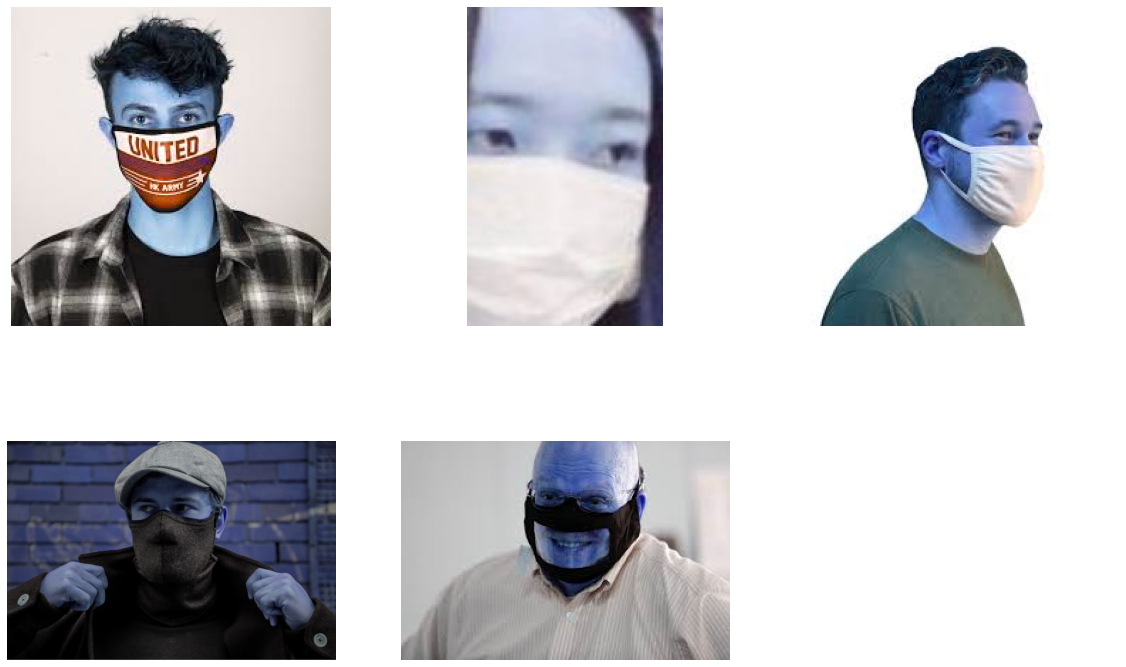

In [ ]:
#Test Your Zaka
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import random
import cv2

multipleImages = glob('/content/drive/MyDrive/Kaggle/Training/with mask/**')
from glob import glob
def plotImages2():
    r = random.sample(multipleImages, 5)
    plt.figure(figsize=(20,20))
    plt.subplot(331)
    plt.imshow(cv2.imread(r[0])); plt.axis('off')
    plt.subplot(332)
    plt.imshow(cv2.imread(r[1])); plt.axis('off')
    plt.subplot(333)
    plt.imshow(cv2.imread(r[2])); plt.axis('off')
    plt.subplot(334)
    plt.imshow(cv2.imread(r[3])); plt.axis('off')
    plt.subplot(335)
    plt.imshow(cv2.imread(r[4])); plt.axis('off')
plotImages2()

Do the same for people without mask.

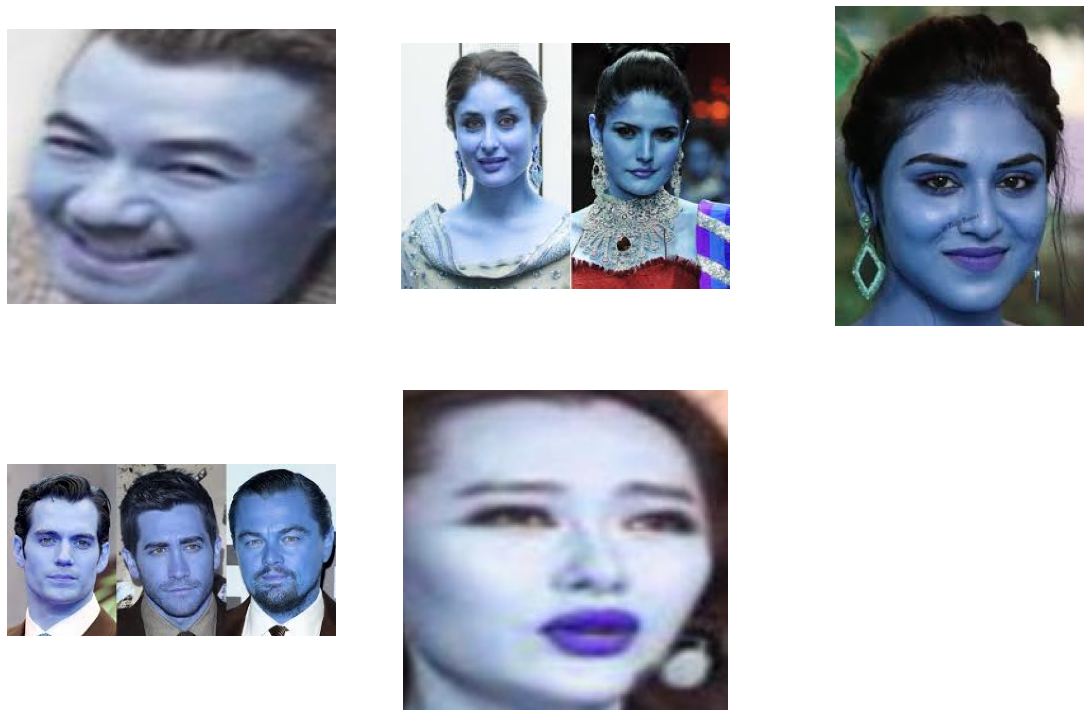

In [ ]:
#Test Your Zaka
multipleImages = glob('/content/drive/MyDrive/Kaggle/Training/without mask/**')
plotImages2()

##Modeling

Define a model structure that can deal with the images that we have to classify them between the 2 classes.

In [ ]:
#Test Your Zaka
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential

model = Sequential([
  layers.Rescaling(1./255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

Train the model that you defined on the training data and evaluate it on the validation data. Feel free to tune the hyperparameters of your model until you reach a satisfying result on the validation set. </br>
**N.B:** Make sure to save the model training history in a variable to plot later the learning curve.

In [ ]:
#Test Your Zaka
x_train=[]

for folder in os.listdir(training_path):

    sub_path=training_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)
x_val=[]

for folder in os.listdir(validation_path):

    sub_path=validation_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)
        x_test=[]

for folder in os.listdir(testing_path):

    sub_path=testing_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

Plot the accuracy curve and see if your model is overfit.

In [ ]:
train_x=np.array(x_train)
val_x=np.array(x_val)
test_x=np.array(x_test)

In [ ]:
train_x=train_x/255.0
val_x=val_x/255.0
test_x=test_x/255.0

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(training_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 )
val_set = val_datagen.flow_from_directory(validation_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                           )
test_set = test_datagen.flow_from_directory(testing_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            )

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
train_y=training_set.classes
val_y=val_set.classes
test_y=test_set.classes

In [ ]:
training_set.class_indices

{'with mask': 0, 'without mask': 1}

In [ ]:
train_y.shape,test_y.shape,val_y.shape

((1000,), (100,), (200,))

In [ ]:
#Test Your Zaka
#Test Your Zaka
import shutil
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.random import set_seed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential

random.seed(11)
set_seed(11)
np.random.seed(11)

INPUT_SHAPE = training_set.image_shape

model = Sequential()

model.add(Conv2D(filters=64,kernel_size=3,strides=1,activation="relu",input_shape=INPUT_SHAPE))
model.add(Conv2D(filters=64,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))

model.add(Conv2D(filters=128,kernel_size=3,strides=1,activation="relu"))
model.add(Conv2D(filters=128,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))

model.add(Conv2D(filters=256,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))

model.add(Conv2D(filters=512,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))


model.add(Flatten())

model.add(Dense(units=512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=1024,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["binary_accuracy"])

##Evaluate the model


Now you will evaluate the model that you built on the testing set that you kept aside since the beginning.

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 conv2d_9 (Conv2D)           (None, 106, 106, 128)     147584    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 53, 53, 128)      0         
 2D)                                                  

In [ ]:
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=1,
  batch_size=20,shuffle=True)

50/50 [==============================] - 816s 16s/step - loss: 0.4744 - binary_accuracy: 0.8070 - val_loss: 0.5064 - val_binary_accuracy: 0.7400


<function matplotlib.pyplot.show>

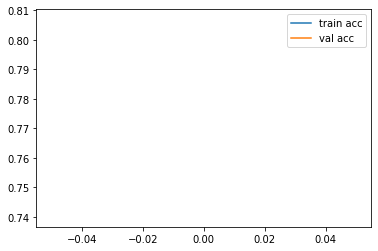

In [ ]:
plt.plot(history.history['binary_accuracy'], label='train acc')
plt.plot(history.history['val_binary_accuracy'], label='val acc')

plt.legend()
plt.show

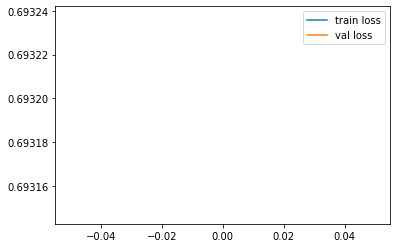

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

**In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy drops in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable—a sign of overfitting.**

In [ ]:
#Test Your Zaka
model.evaluate(test_x,test_y,batch_size=32)

4/4 [==============================] - 22s 5s/step - loss: 0.5616 - binary_accuracy: 0.7900


[0.5615991353988647, 0.7900000214576721]

Now we want to visualize the confusion matrix in order to see how much our classifier is good in predicting different classes.

In [ ]:
#Test Your Zaka
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)
#get classification report
print(classification_report(y_pred,test_y))
#get confusion matrix
print(confusion_matrix(y_pred,test_y))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67       100
           1       0.00      0.00      0.00         0

    accuracy                           0.50       100
   macro avg       0.50      0.25      0.33       100
weighted avg       1.00      0.50      0.67       100

[[50 50]
 [ 0  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**What did you learn about your model from this confusion matrix?**

**The model performance was okay.However the scores are much better for 0 classification rather than 1.**

##Error Analysis

Now we need to see for each of the images that we have in our testing set, what did the model predict. This helps us analyze the errors and try to think why the model predicted some things in the wrong way.

In [ ]:
class_names=[{'with mask': 0, 'without mask': 1}]
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

**Try to derive some conclusions from the wrong predictions that your model has made. Meaning: why do you think these predictions were wrong?**

- **Without mask:** The image with index (1,1) was classified as 1 but the truth is 0. Maybe the model was tricked by the bounding box around the face and considered it as a mask for example.
- **With mask:** The image with index (4,7) was classified as 0 but the truth is 1. Maybe the training data does not contain images for people showing only one quarter of their face, and this is why it was not classified correctly.

**Think of a way that you can use in order to improve the performance of your model, and implement it**

* Getting More Data
* Training for longer
* Transfer Learning

**Your Friend took your code and ran it again, but obtained different accuracies on the different sets. How do you interpret this?**

At the beginning we sampled data from the big dataset, and unless seeds are the same, each time we would have different samples, and when the training data differs definitely we will obtain another model with another performance. Even the validation and testing data would be different and of course the accuracies would be diffrent as well.

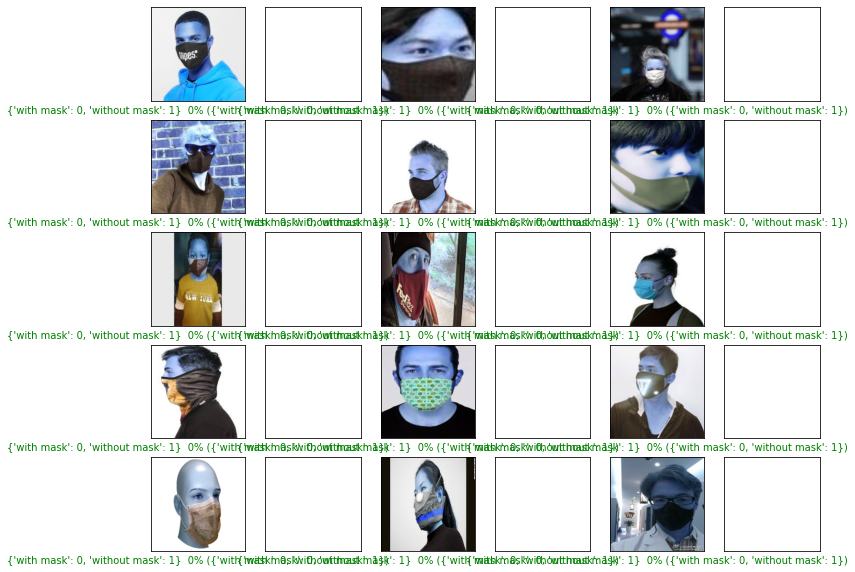

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, y_pred, test_y, test_x)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, y_pred, test_y)
plt.show()

AttributeError: ignored

<Figure size 1440x1440 with 0 Axes>

In [ ]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 4.2 MB 4.6 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [ ]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

AttributeError: ignored

In [ ]:
y_pred.shape

(100,)

In [ ]:
y_pred[0]
test_y[0]

0

In [ ]:
batch_size = 40
img_height = 200
img_width = 200
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    training_path,
    validation_split=0.2,
    subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)
class_names = training_ds.class_names
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Found 1000 files belonging to 2 classes.
Using 800 files for training.


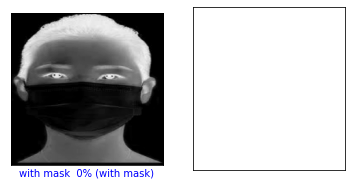

In [ ]:
i = 44
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, y_pred, test_y, test_x)
plt.subplot(1,2,2)
plot_value_array(i, y_pred, test_y)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

NameError: ignored

NameError: ignored

FileNotFoundError: ignored

NameError: ignored

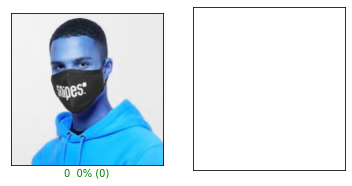